**Data Cleaning** 

Removing Duplicate values

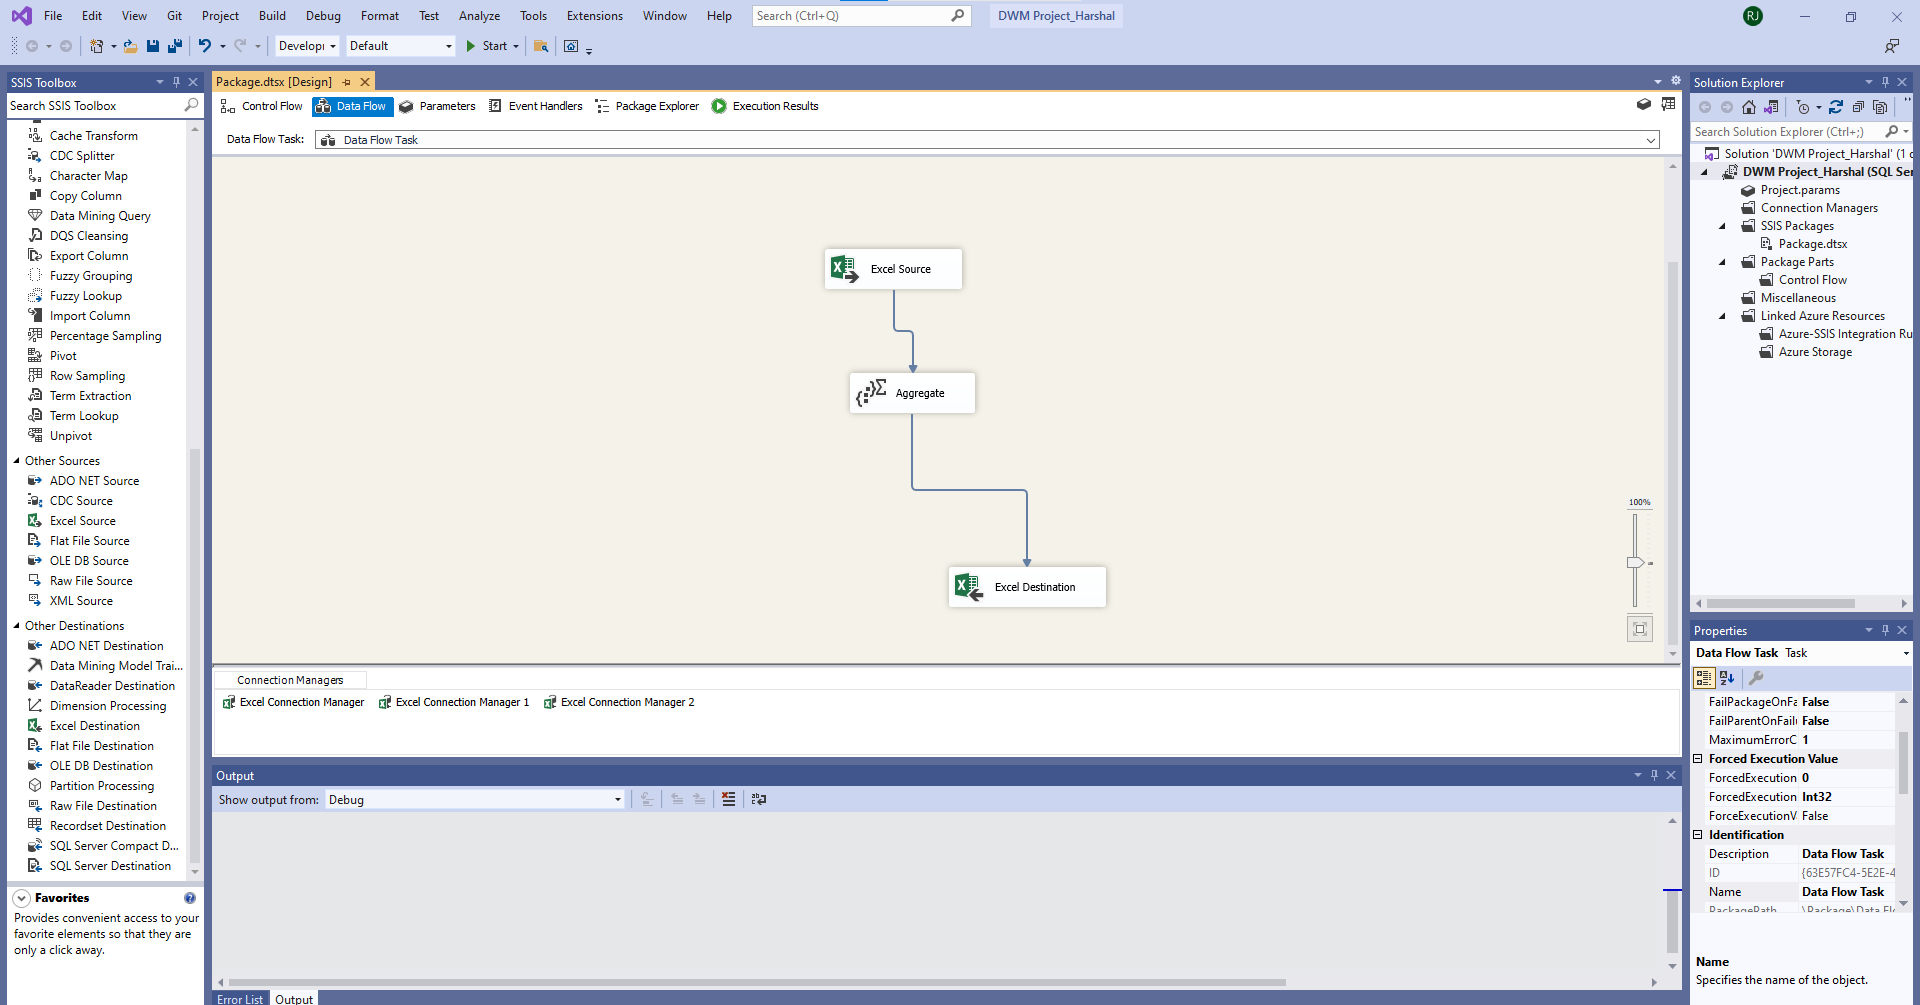

In [4]:
import numpy as np
import pandas as pd

# Original dataset
df = pd.read_csv("/content/DWM_Project.csv")

# Additional dataset
df2 = pd.read_csv("/content/urldata.csv")



In [4]:
#Drop NULL Values
df.dropna(inplace=True)

df.isnull().sum()

df2.drop(columns = ['Unnamed: 0', 'label'], inplace=True)

#Change Dtypes 
df['label'] = df['label'].astype(int)

df.dtypes


domain    object
label      int64
dtype: object

In [5]:
#Renaming columns in both columns
df.rename(columns={"domain": "url", "label": "phishing"}, inplace=True)
df2.rename(columns={"result": "phishing"}, inplace=True)

In [6]:
#Correcting the format of the url in dataset
df['url'] = 'https://' + df['url'].astype(str)

df.head()


,url,phishing
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1
3,https://mail.printakid.com/www.online.american...,1
4,https://thewhiskeydregs.com/wp-content/themes/...,1


In [7]:
#Merge Data finally 
df_final = pd.concat([df, df2])

In [8]:
def initial_read(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [9]:
initial_read(df_final)


SHAPE
(546089, 2)
=====
DTYPES
url         object
phishing     int64
dtype: object
=====
NULL VALUES
url         0
phishing    0
dtype: int64
=====


In [10]:
df_final[df_final.duplicated()]


,url,phishing
35411,https://bin/webscr?cmd=_login-,1
45182,https://www.allegropl.xaa.pl/enter_login.html?...,1
129252,https://www.airnav.com/airports/us/TX,0
140534,https://www.apple.com/quicktime/,0
167423,https://www.conitec.net/english/gstudio/,0
...,...,...
345307,https://homepage.ntlworld.com/fetchfido2/inter...,0
345310,https://www.infopeople.org/search/chart.html,0
345313,https://l-lists.com/en/lists/lv2azk.html,0
345318,https://www.bruceclay.com/searchenginechart.pdf,0


We can see above that there still 194 rows which are duplicated.

In [11]:
df_final.drop_duplicates(inplace=True)


In [12]:
df_final.to_csv('/content/url_final.csv', index=False)


**Pre Processing Data**

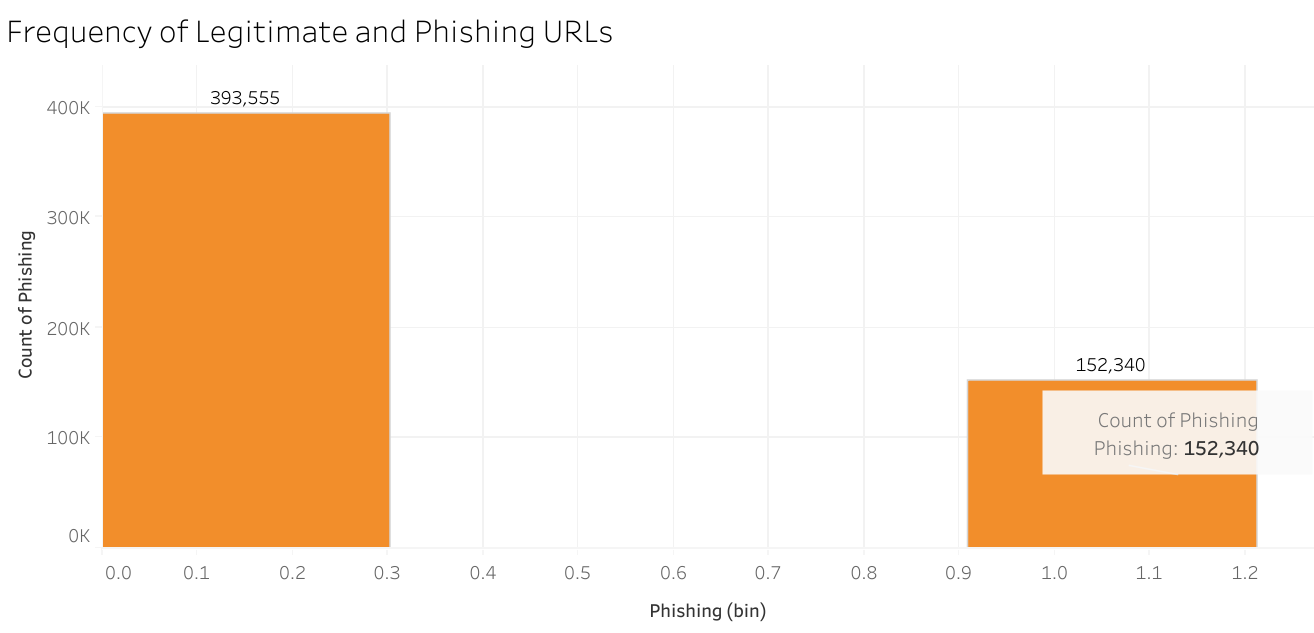

In [16]:
import urllib
from urllib.parse import urlparse 

df = pd.read_csv("/content/url_final.csv")
df.head()

urls = [url for url in df['url']]

df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])
df.head()


,url,phishing,protocol,domain,path,query,fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,,
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,


*Calculating the features of URL in the dataset.*

In [21]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))


In [22]:
get_features(df)

df.to_csv('/content/url_updated.csv', index=False)


In [27]:
data = pd.read_csv("/content/url_updated.csv")

data.head()


<ipython-input-27-493c45f96abb>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/url_updated.csv")


,url,phishing,protocol,domain,path,query,fragment,url_length,qty_dot_url,qty_hyphen_url,...,qty_and_fragment,qty_exclamation_fragment,qty_space_fragment,qty_tilde_fragment,qty_comma_fragment,qty_plus_fragment,qty_asterisk_fragment,qty_hashtag_fragment,qty_dollar_fragment,qty_percent_fragment
0,https://nobell.it/70ffb52d079109dca5664cce6f31...,1,https,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,NaN,233,6,4,...,0,0,0,0,0,0,0,0,0,0
1,https://www.dghjdgf.com/paypal.co.uk/cycgi-bin...,1,https,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,NaN,NaN,89,5,2,...,0,0,0,0,0,0,0,0,0,0
2,https://serviciosbys.com/paypal.cgi.bin.get-in...,1,https,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,NaN,NaN,185,7,1,...,0,0,0,0,0,0,0,0,0,0
3,https://mail.printakid.com/www.online.american...,1,https,mail.printakid.com,/www.online.americanexpress.com/index.html,NaN,NaN,68,6,0,...,0,0,0,0,0,0,0,0,0,0
4,https://thewhiskeydregs.com/wp-content/themes/...,1,https,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,84784787824HDJNDJDSJSHD//2724782784/,NaN,124,1,1,...,0,0,0,0,0,0,0,0,0,0


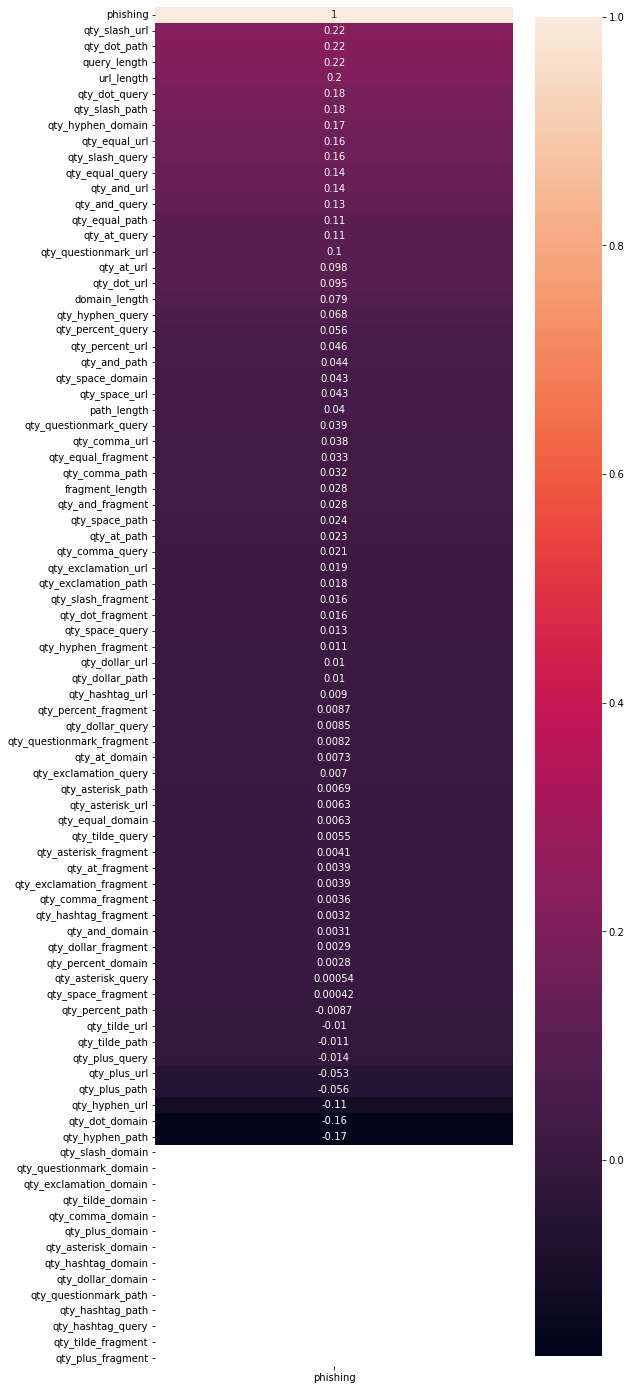

In [28]:
col_in_question = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain', 
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path', 
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_plus_fragment']

for col in col_in_question:
    print(df[col].value_counts())
  
df.drop(columns = col_in_question, inplace=True)

#save data
df.to_csv('/content/url_updated.csv', index=False)


0    545895
Name: qty_slash_domain, dtype: int64
0    545895
Name: qty_questionmark_domain, dtype: int64
0    545880
1        13
5         2
Name: qty_equal_domain, dtype: int64
0    545883
1        11
2         1
Name: qty_at_domain, dtype: int64
0    545893
4         1
5         1
Name: qty_and_domain, dtype: int64
0    545895
Name: qty_exclamation_domain, dtype: int64
0    545472
1       420
2         2
6         1
Name: qty_space_domain, dtype: int64
0    545895
Name: qty_tilde_domain, dtype: int64
0    545895
Name: qty_comma_domain, dtype: int64
0    545895
Name: qty_plus_domain, dtype: int64
0    545895
Name: qty_asterisk_domain, dtype: int64
0    545895
Name: qty_hashtag_domain, dtype: int64
0    545895
Name: qty_dollar_domain, dtype: int64
0    545893
5         1
2         1
Name: qty_percent_domain, dtype: int64
0    545895
Name: qty_questionmark_path, dtype: int64
0    545895
Name: qty_hashtag_path, dtype: int64
0    545895
Name: qty_hashtag_query, dtype: int64
0    545890
1 

**Data Analysis using Algorithms**

In [63]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(42)

df = pd.read_csv('/content/url_updated.csv')

print('Here is the baseline : \n',df['phishing'].value_counts(normalize=True))


Here is the baseline : 
 0    0.720935
1    0.279065
Name: phishing, dtype: float64


In [6]:
X = df.drop(columns=['url', 'protocol', 'domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y )

In [7]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [8]:
def get_scores_sc(model):
    
    # instantiate model
    model = model()
    
    # fit to scaled data
    model.fit(X_train_sc, y_train)
    
    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [9]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return


In [10]:
get_scores_sc(DecisionTreeClassifier)


DecisionTreeClassifier() Training Score: 0.9790704433822398
DecisionTreeClassifier() Testing Score: 0.9400838254905697

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     98389
           1       0.92      0.85      0.89     38085

    accuracy                           0.94    136474
   macro avg       0.94      0.91      0.92    136474
weighted avg       0.94      0.94      0.94    136474

[[95749  2640]
 [ 5537 32548]]


In [10]:
get_scores(ExtraTreesClassifier)


ExtraTreesClassifier() Training Score: 0.9790704433822398
ExtraTreesClassifier() Testing Score: 0.9434544308806073

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     98389
           1       0.93      0.86      0.89     38085

    accuracy                           0.94    136474
   macro avg       0.94      0.92      0.93    136474
weighted avg       0.94      0.94      0.94    136474

[[96067  2322]
 [ 5395 32690]]


In [11]:
get_scores(RandomForestClassifier)


RandomForestClassifier() Training Score: 0.9790606734876813
RandomForestClassifier() Testing Score: 0.9452349898149098

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     98389
           1       0.94      0.86      0.90     38085

    accuracy                           0.95    136474
   macro avg       0.94      0.92      0.93    136474
weighted avg       0.94      0.95      0.94    136474

[[96183  2206]
 [ 5268 32817]]


In [2]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=9b73aa4c0877fd759f75635851469b41980ccd326e2ec33561a4f55808707fe8
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [11]:
import streamlit as st

@st.cache
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(X_train, y_train)
    
    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

st.title("Phishing Detection Model")

# Create sidebar
st.sidebar.title("Input Values")

# Create main page
st.write("Here you can input values and get the output of the model")

# Create input slider
num_input = st.sidebar.slider("Please select numbers", min_value=0, max_value=100, value=0)

# Create submit button
submit_button = st.sidebar.button("Submit")

# Create main page
st.write("Your output is:")

# Create output
if submit_button:
    get_scores(RandomForestClassifier)
    st.write(num_input)
